<a href="https://colab.research.google.com/github/collinsbett1/Hass-Consluting-House-Pricing/blob/main/Hass_Consulting_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hass Consulting Company: House Pricing

## 1. Defining the question.


### a) Specifying the Data Analytic Question.
> Using information collected over the past few months on real estate properties, what factors affect housing prices?

### b) Defining the Metric for Success.

> The analysis will be declared a success once when the following requirements have been satisfied;
1. Found the factors affecting housing prices.
2. Created models that can help us predict housing prices given the factors and variables available. These models include;
  * Multiple Linear Regression
  * Quantile Regression
  * Ridge Regression
  * Lasso Regression
  * Elastic Net Regression

### c) Understanding the context.
> As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## 2. Reading the Data.

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import statsmodels.formula.api as smf
# 
# Loading the dataset
df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 3. Checking the Data


In [3]:
# Determining the number of records in our dataset.
df.shape

(21613, 20)

In [4]:
# Previewing the head of the dataset
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [5]:
# Previewing the tail of the dataset
df.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [6]:
# Checking whether each column has an appropriate datatype
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Description of the numerical data
df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.401822e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.673622e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

## 4. Tidying the dataset.

In [8]:
# Identifying the Missing Data
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# Checking for duplicates
df.duplicated().value_counts()

False    21610
True         3
dtype: int64

In [10]:
# Dropping the duplicates
df.drop_duplicates(keep= False, inplace=True)

In [11]:
#getting the number unique values in each column
df.nunique()

id               21433
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9780
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8688
dtype: int64

In [12]:
# drop the unnecessary 'n_daily_data_points' column
df.drop(['id'], axis = 1, inplace=True)

In [13]:
# Saving the cleaned dataset 
df.to_csv("newprices.csv", index=False)
# Reading the new dataset
df1 = pd.read_csv("newprices.csv")
df1.head()

price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3       1.00  ... -122.257           1340        5650
1  538000.0         3       2.25  ... -122.319           1690        7639
2  180000.0         2       1.00  ... -122.233           2720        8062
3  604000.0         4       3.00  ... -122.393           1360        5000
4  510000.0         3       2.00  ... -122.045           1800        7503

[5 rows x 19 columns]

## 5. Exploratory Data Analysis.

### 5.1 Univariate Analysis.

### 5.1.1 Numerical Variables

##### a) Measures of Central Tendancy

In [14]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
#using for loops to get the mean, mode and median for the home score column
numerical_columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for column in numerical_columns:
  print('\n')
  print(column + ', Mean: ' + str(df1[column].mean()))
  print(column + ', Mode: ' + str(df1[column].mode()))
  print(column + ', Median: ' + str(df1[column].median()))



price, Mean: 540175.729994909
price, Mode: 0    350000.0
1    450000.0
dtype: float64
price, Median: 450000.0


bedrooms, Mean: 3.370852038691165
bedrooms, Mode: 0    3
dtype: int64
bedrooms, Median: 3.0


bathrooms, Mean: 2.1147197667422595
bathrooms, Mode: 0    2.5
dtype: float64
bathrooms, Median: 2.25


sqft_living, Mean: 2079.8626833896424
sqft_living, Mode: 0    1300
dtype: int64
sqft_living, Median: 1910.0


sqft_lot, Mean: 15109.61244041283
sqft_lot, Mode: 0    5000
dtype: int64
sqft_lot, Median: 7620.0


floors, Mean: 1.4941685564863239
floors, Mode: 0    1.0
dtype: float64
floors, Median: 1.5


waterfront, Mean: 0.00754385152959689
waterfront, Mode: 0    0
dtype: int64
waterfront, Median: 0.0


view, Mean: 0.23409080390614154
view, Mode: 0    0
dtype: int64
view, Median: 0.0


condition, Mean: 3.4094506409959737
condition, Mode: 0    3
dtype: int64
condition, Median: 3.0


grade, Mean: 7.65668533345675
grade, Mode: 0    7
dtype: int64
grade, Median: 7.0


sqft_above, Mean: 

##### b) Measures of Dispersion

In [16]:
numerical_columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: ' + str(df1[column].std()))
  print(column + ', Variance: ' + str(df1[column].var()))
  print(column + ', Skewness: ' + str(df1[column].skew()))
  print(column + ', Kurtosis: ' + str(df1[column].kurt()))
  print(column + ', Quartiles: ' + str(df1[column].quantile([0.25,0.5,0.75])))



price, Standard deviation: 367412.9436520466
price, Variance: 134992271163.06197
price, Skewness: 4.021219314159555
price, Kurtosis: 34.512431045542755
price, Quartiles: 0.25    321500.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64


bedrooms, Standard deviation: 0.9301575796215148
bedrooms, Variance: 0.8651931229273547
bedrooms, Skewness: 1.9741875415424084
bedrooms, Kurtosis: 49.05656269435474
bedrooms, Quartiles: 0.25    3.0
0.50    3.0
0.75    4.0
Name: bedrooms, dtype: float64


bathrooms, Standard deviation: 0.7702442560193762
bathrooms, Variance: 0.5932762139308424
bathrooms, Skewness: 0.5112210026478299
bathrooms, Kurtosis: 1.2793718580966322
bathrooms, Quartiles: 0.25    1.75
0.50    2.25
0.75    2.50
Name: bathrooms, dtype: float64


sqft_living, Standard deviation: 918.5597124663008
sqft_living, Variance: 843751.945366173
sqft_living, Skewness: 1.4715089441356635
sqft_living, Kurtosis: 5.24135281655753
sqft_living, Quartiles: 0.25    1423.5
0.50    1910.0


##### Bar Graphs

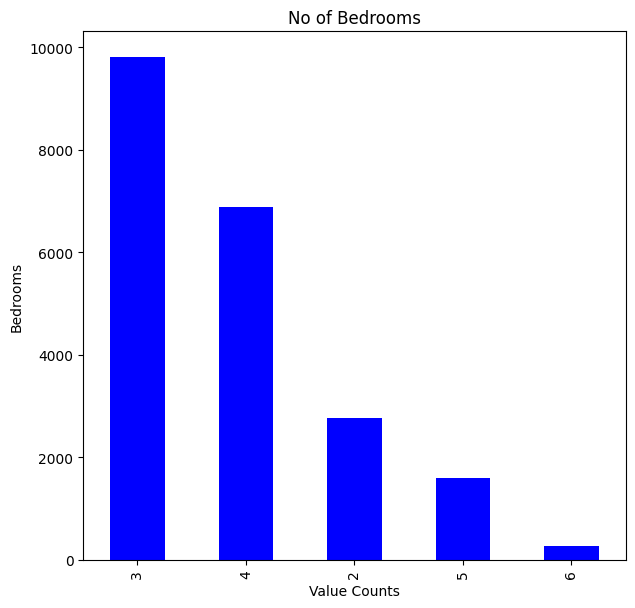

In [17]:
#creating a bar graph of the number of bedrooms
#
plt.figure(figsize = (7,7), dpi = 100)
df1.bedrooms.value_counts().head()
df1.bedrooms.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of Bedrooms')
plt.xlabel('Value Counts')
plt.ylabel('Bedrooms')
plt.show()

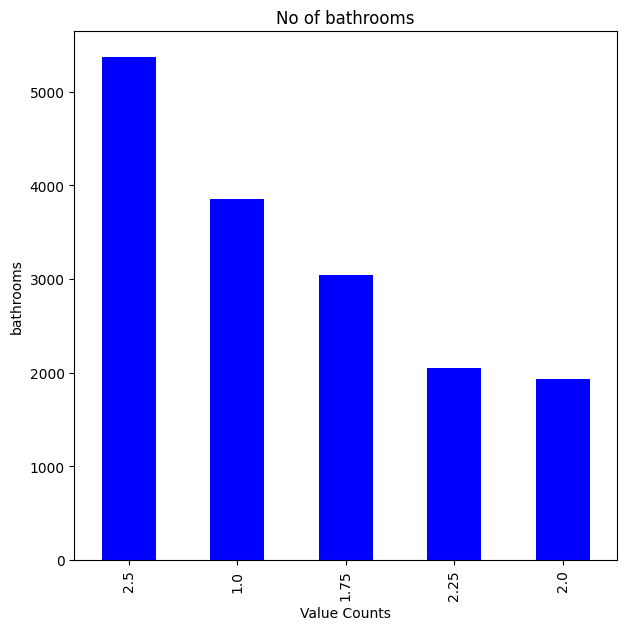

In [18]:
#creating a bar graph of the number of bathrooms
#
plt.figure(figsize = (7,7), dpi = 100)
df1.bathrooms.value_counts().head()
df1.bathrooms.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of bathrooms')
plt.xlabel('Value Counts')
plt.ylabel('bathrooms')
plt.show()

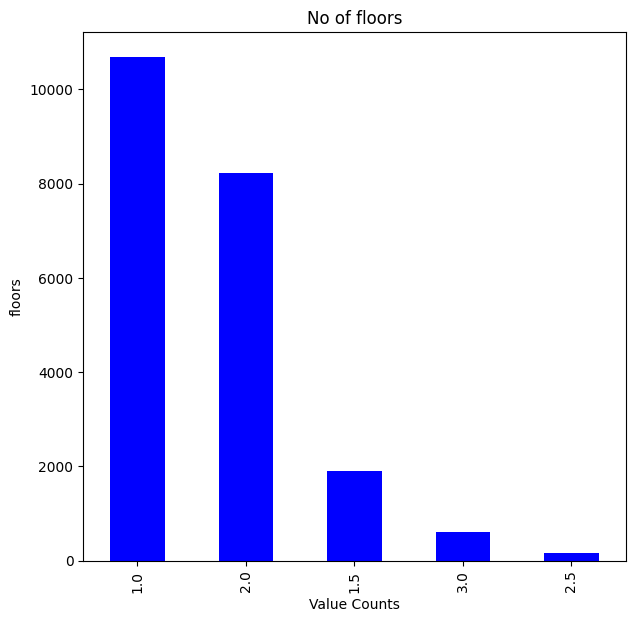

In [19]:
#creating a bar graph of the floors
plt.figure(figsize = (7,7), dpi = 100)
df1.floors.value_counts().head()
df1.floors.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of floors')
plt.xlabel('Value Counts')
plt.ylabel('floors')
plt.show()

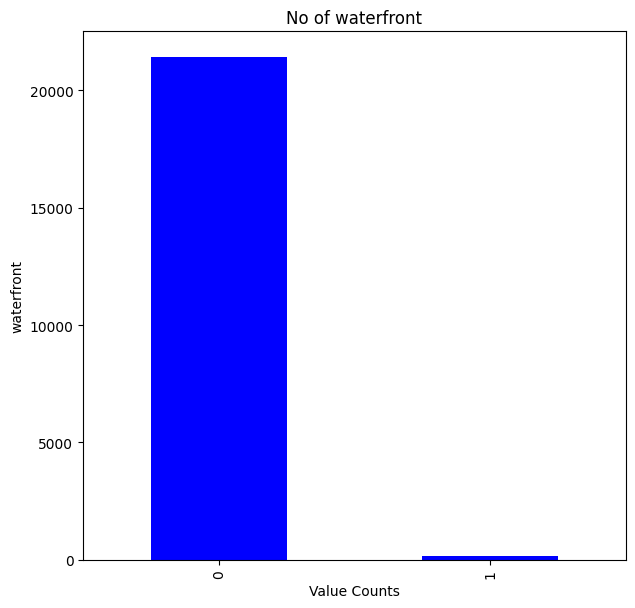

In [20]:
#creating a bar graph of the houses with waterfronts.
#
plt.figure(figsize = (7,7), dpi = 100)
df1.waterfront.value_counts().head()
df1.waterfront.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of waterfront')
plt.xlabel('Value Counts')
plt.ylabel('waterfront')
plt.show()

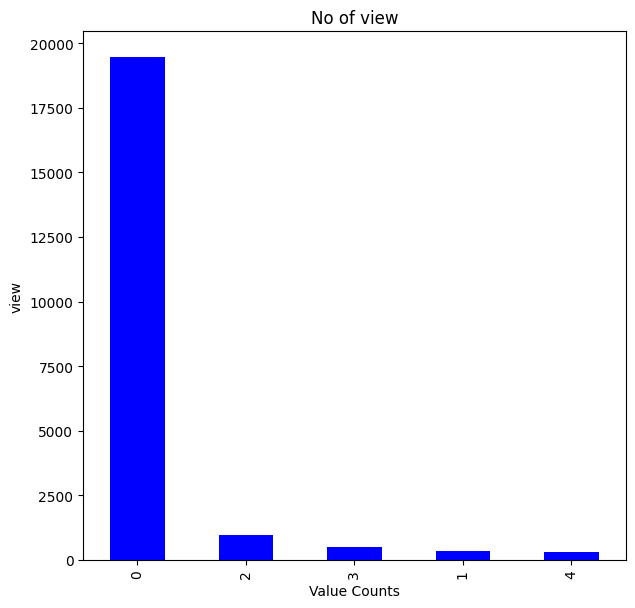

In [21]:
#creating a bar graph of the view
#
plt.figure(figsize = (7,7), dpi = 100)
df1.view.value_counts().head()
df1.view.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of view')
plt.xlabel('Value Counts')
plt.ylabel('view')
plt.show()

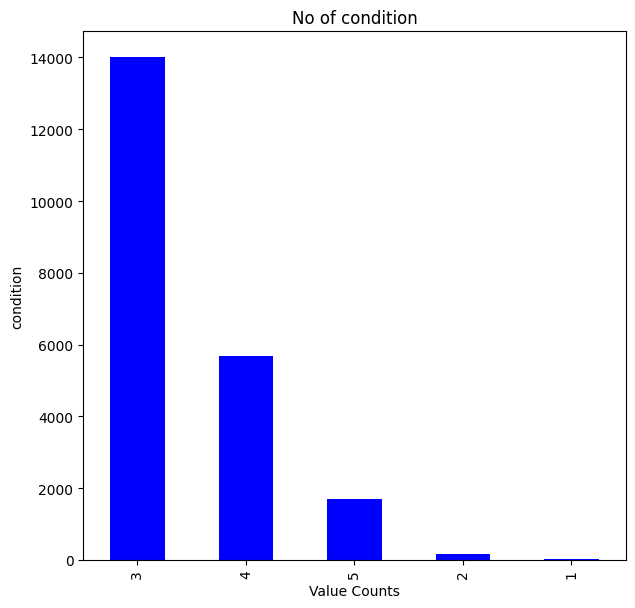

In [22]:
#creating a bar graph of the condition
plt.figure(figsize = (7,7), dpi = 100)
df1.condition.value_counts().head()
df1.condition.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of condition')
plt.xlabel('Value Counts')
plt.ylabel('condition')
plt.show()

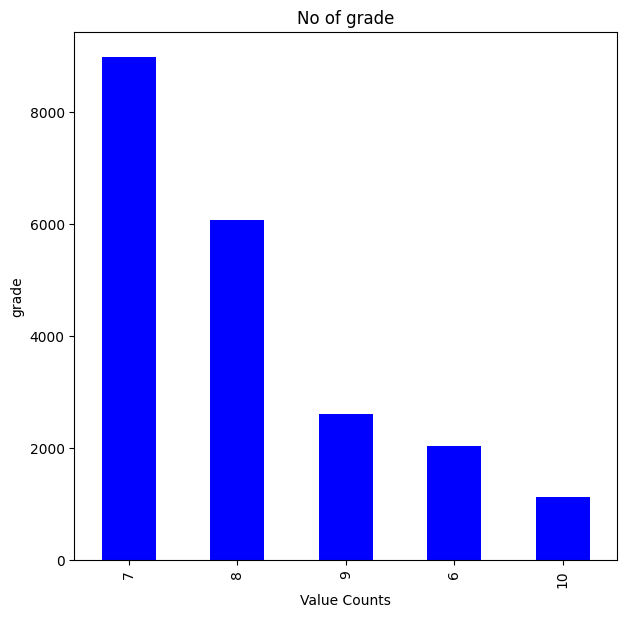

In [23]:
#creating a bar graph of the condition
plt.figure(figsize = (7,7), dpi = 100)
df1.grade.value_counts().head()
df1.grade.value_counts().head().plot(kind= 'bar',color='Blue')
plt.title('No of grade')
plt.xlabel('Value Counts')
plt.ylabel('grade')
plt.show()

In [24]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 5.2 Bivariate Analysis.

#### 5.2.1 Numerical and Numerical

##### a) Scatter Plot

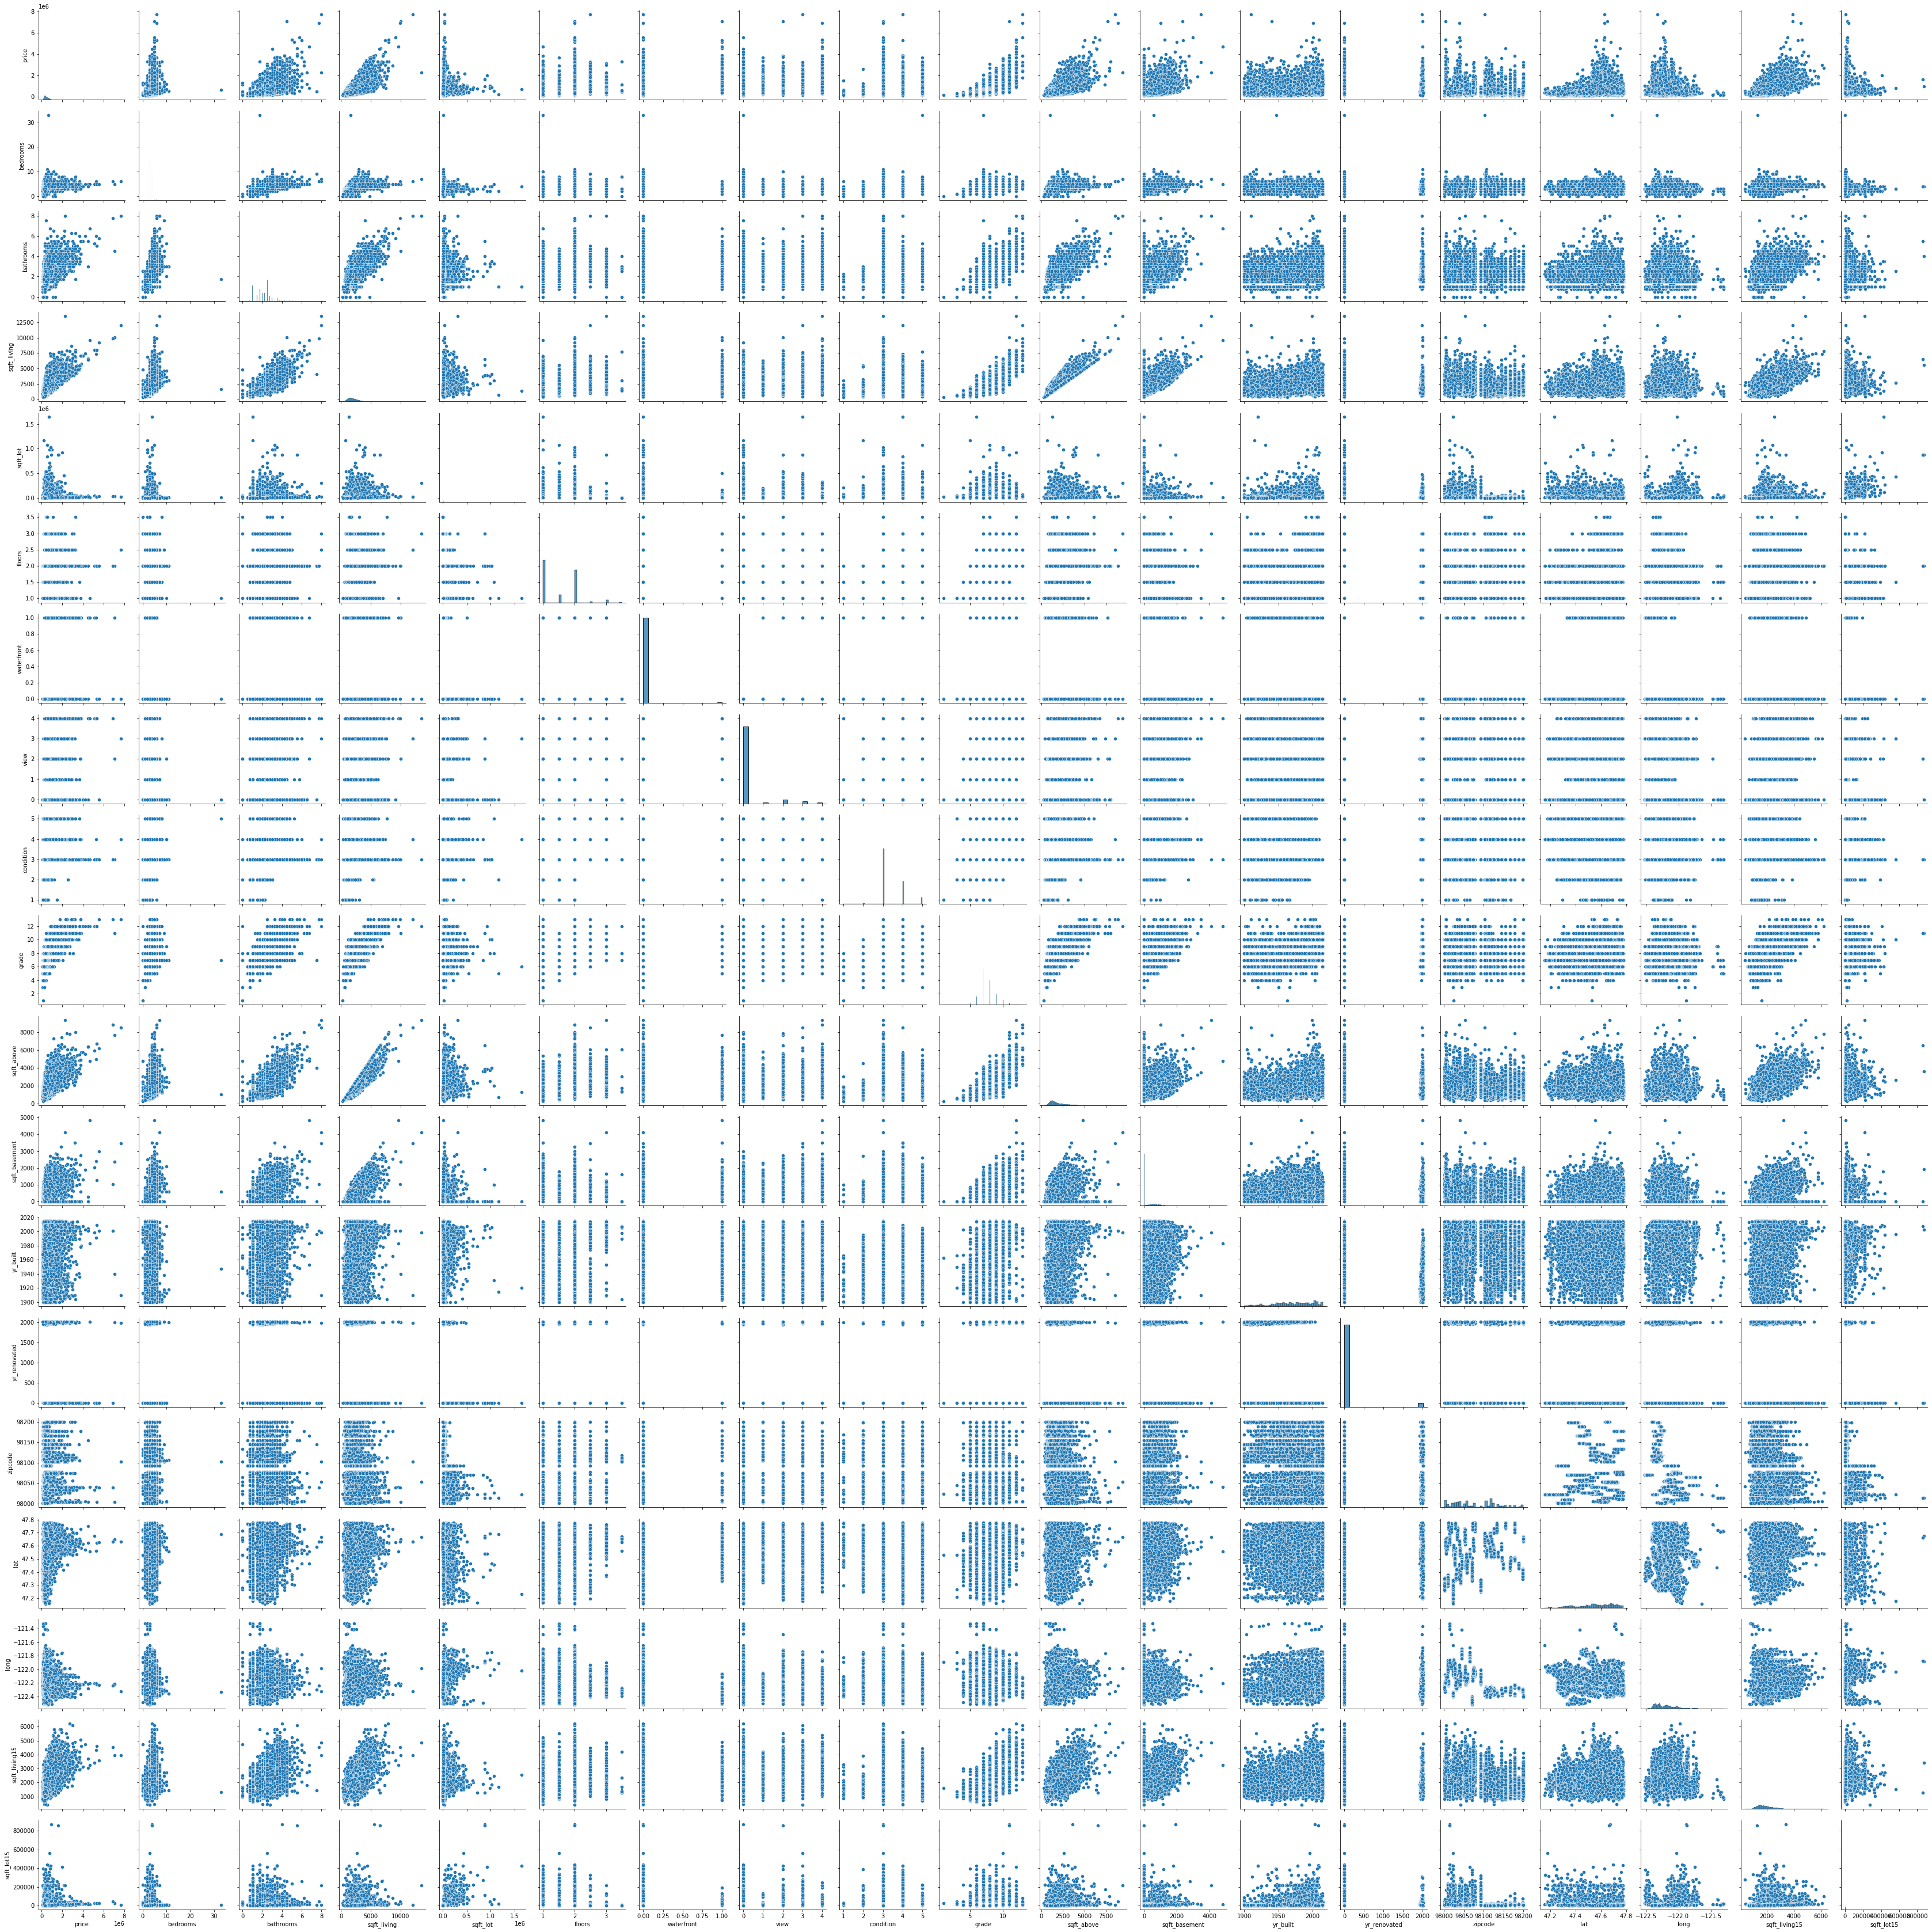

In [55]:
# Bivariate summaries 
sns.pairplot(df1);

##### b) Correlation

In [26]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df1.corr()

corr.style.background_gradient(cmap='coolwarm')

> Price had a high correlation with bathrooms, sqft_living, grade, sqft_above and sqft_living15

> 

##### c) Bar Charts

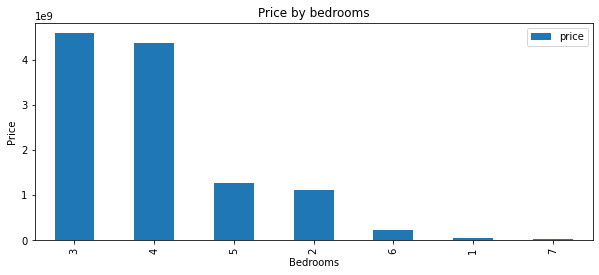

In [57]:
#checking price by bedrooms
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('bedrooms')['price'].sum().sort_values(ascending=False).head(7).to_frame().plot(kind = "bar", title = "Price by bedrooms");
ax.set(xlabel='Bedrooms', ylabel='Price')
plt.show()

> 3 bedroom houses had the highest prices.

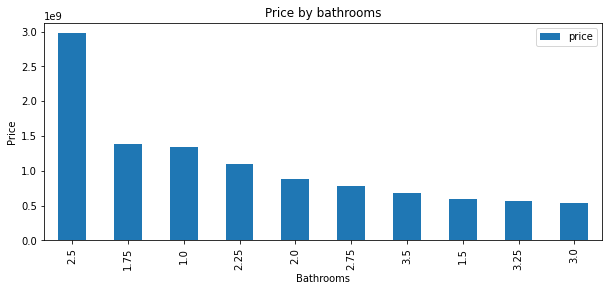

In [28]:
# checking price by bathrooms
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('bathrooms')['price'].sum().sort_values(ascending=False).head(10).to_frame().plot(kind = "bar", title = "Price by bathrooms");
ax.set(xlabel='Bathrooms', ylabel='Price')
plt.show()

> Houses with 2.5 bathrooms had the highest prices.

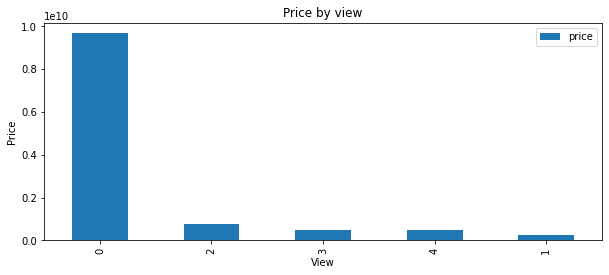

In [58]:
# checking price by view
plt.rcParams["figure.figsize"] = (10,4)
ax = df.groupby('view')['price'].sum().sort_values(ascending=False).head(10).to_frame().plot(kind = "bar", title = "Price by view");
ax.set(xlabel='View', ylabel='Price')
plt.show()

> Houses with no view had the highest prices.

### 5.3 Multivariate Analysis.

#### LDA

In [30]:
# Divide the dataset into features and corresponding labels.
X = df1.drop(["price"],axis=1)
y = df1[['price']]

In [31]:
#checking for unique values of the target variable
np.unique(y)

array([  75000.,   78000.,   80000., ..., 6890000., 7060000., 7700000.])

In [32]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [33]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_. transform(X)

#displaying the coefficients of the reducted columns
lda.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-2.59534931e+00, -6.32337241e+00,  1.83358987e-03, ...,
         1.97069971e+01, -1.01569078e-03,  2.22734589e-05],
       [-8.18529726e-01,  1.00702804e-01, -1.31667525e-03, ...,
         5.16452230e+00,  2.80388477e-03, -4.94038275e-06],
       [-2.89908741e+00,  1.39634770e+00, -9.77499230e-05, ...,
         2.73651848e+01, -6.33601939e-04, -1.15572257e-05],
       ...,
       [-6.62687467e+00,  1.35574371e+01,  1.64272562e-02, ...,
        -3.21561611e+01, -8.21722414e-03,  1.63581135e-05],
       [-7.49059479e+00, -4.50221572e+00,  2.43145332e-02, ...,
        -2.52054986e+01, -7.39373343e-03, -6.33692820e-05],
       [-1.02879106e+01,  9.47278280e+00,  2.47027014e-02, ...,
        -1.63973545e+01, -1.19452771e-02, -7.32276619e-05]])

In [34]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

0
long           19.706997
floors          1.359537
yr_built        0.143868
zipcode         0.013066
sqft_basement   0.002283
sqft_living     0.001834
sqft_above      0.000812
sqft_lot15      0.000022
sqft_lot       -0.000019
yr_renovated   -0.000537
sqft_living15  -0.001016
view           -0.798367
condition      -2.550923
bedrooms       -2.595349
bathrooms      -6.323372
grade         -11.096233
waterfront    -12.107437
lat           -43.949550

> The important features are slong, floors, yr_built, zipcode,sqft_living, sqft_above, sqft_lot15

## 6. Building the Model.

In [35]:
# Let's display the correlations between the variables
correlations = df1.corr()

correlations

price  bedrooms  ...  sqft_living15  sqft_lot15
price          1.000000  0.308354  ...       0.585391    0.082459
bedrooms       0.308354  1.000000  ...       0.391628    0.029221
bathrooms      0.525146  0.515986  ...       0.568696    0.087207
sqft_living    0.702048  0.576677  ...       0.756419    0.183285
sqft_lot       0.089660  0.031695  ...       0.144632    0.718555
floors         0.256801  0.175467  ...       0.279838   -0.011231
waterfront     0.266333 -0.006584  ...       0.086475    0.030700
view           0.397586  0.079335  ...       0.280369    0.072580
condition      0.036402  0.028372  ...      -0.092883   -0.003443
grade          0.667494  0.357039  ...       0.713214    0.119283
sqft_above     0.605572  0.477637  ...       0.731870    0.194069
sqft_basement  0.323860  0.303060  ...       0.200379    0.017244
yr_built       0.053979  0.154373  ...       0.326366    0.071039
yr_renovated   0.126565  0.018550  ...      -0.003010    0.007819
zipcode       -0.053156 -0.152773  ...      -0.279032   -0.147293
lat            0.306925 -0.008975  ...       0.048819   -0.086426
long           0.021564  0.129474  ...       0.334579    0.254499
sqft_living15  0.585391  0.391628  ...       1.000000    0.183197
sqft_lot15     0.082459  0.029221  ...       0.183197    1.000000

[19 rows x 19 columns]

In [36]:
# Computing the VIF score for each variable.
VIF = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
VIF

price  bedrooms  ...  sqft_living15  sqft_lot15
price          3.331762  0.301456  ...      -0.134942    0.094651
bedrooms       0.301456  1.679531  ...       0.013146    0.093996
bathrooms     -0.286414 -0.487598  ...       0.103508    0.063279
sqft_living   -0.680659 -0.723876  ...      -1.471655   -0.342561
sqft_lot      -0.048034  0.044947  ...       0.165868   -1.460662
floors        -0.033563  0.046966  ...       0.274008    0.071702
waterfront    -0.456809  0.021588  ...       0.072843   -0.031468
view          -0.369128  0.081352  ...      -0.310211   -0.017930
condition     -0.156345 -0.064646  ...       0.082288   -0.032672
grade         -1.023223  0.214253  ...      -0.870155    0.042784
sqft_above    -0.747900 -0.345716  ...      -0.153600    0.094469
sqft_basement -0.274761 -0.190083  ...       0.262467    0.088382
yr_built       0.698362  0.197707  ...       0.049391   -0.013912
yr_renovated  -0.073690  0.039479  ...       0.102326   -0.024252
zipcode        0.282772  0.105821  ...       0.198824   -0.007438
lat           -0.757790 -0.017676  ...      -0.064091    0.015126
long           0.273993  0.042504  ...      -0.365525   -0.153082
sqft_living15 -0.134942  0.013146  ...       2.985047   -0.129407
sqft_lot15     0.094651  0.093996  ...      -0.129407    2.138338

[19 rows x 19 columns]

##### a) Ridge Regression.

In [43]:
# Creating X and y variables
#
X = df1[['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = df1.price

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Training the model
#
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)

# Making predictions
#
y_pred = ridge.predict(X_test)

# Measuring the accuracy of the model
from sklearn.metrics import mean_squared_error
#
print(f'RMSE of Ridge: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Ridge: 158656.19305068816


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [44]:
# Tuning the alpha parameter
# Creating a parameters dictionary
#
params = {'alpha': np.logspace(-5, 2, 8)}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=Ridge(normalize = True), param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {np.sqrt(grid_search.best_score_*-1)} and the best parameters are {grid_search.best_params_}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Best score is 5.9311835558042 and the best parameters are {'alpha': 1e-05}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

##### b) Lasso Regression

In [50]:
# Creating X and y variables
#
X = df1[['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y = df1.price

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Training the model
#
lasso = Lasso(normalize=True)
lasso.fit(X_train, y_train)

# Making predictions
#
y_pred = lasso.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of Lasso: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of Lasso: 130.31059315510257


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


##### c) Elastic Net

In [49]:
# Creating X and y variables
#
X = df1[['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values
y = df1.price.values

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Training the model
#
elastic = ElasticNet(normalize=True)
elastic.fit(X_train, y_train)

# Making predictions
#
y_pred = elastic.predict(X_test)

# Measuring the accuracy of the model
#
print(f'RMSE of ElasticNet: {np.sqrt(mean_squared_error(y_test, y_pred))}')

RMSE of ElasticNet: 373753.9205775834


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
